In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load Dataset
df = pd.read_excel("marketing_campaign.xlsx")
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  2012-09-04       58       635  ...                  7   
1            1  2014-03-08       38        11  ...                  5   
2            0  2013-08-21       26       426  ...                  4   
3            0  2014-02-10       26        11  ...                  6   
4            0  2014-01-19       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  2013-06-13       46       709  ...                  5   
2236         1  2014-06-10       56       406  ...                  7   
2237         0  2014-01-25       91       908  ...                  6   
2238         1  2014-01-24        8       428  ...                  3   
2239         1  2012-10-15       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [3]:
# Data Types & Info
print("🔹 Data Types and Info:\n")
print(df.info())

🔹 Data Types and Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetP

# ✅ Initial Observations:

1. The dataset contains 2,240 entries and 29 columns.

2. Column "ID" appears to be a customer ID and provides no analytical value — can be dropped.

3. Columns "Z_CostContact" and "Z_Revenue" are constants — can also be dropped.

4. The target variable is Response (binary: 0 = No, 1 = Yes).

5. Column "Dt_Customer" is a date and should be converted to datetime type.

6. The dataset contains a mix of demographics (Age, Income, Education, Marital_Status) and behavioral features (purchases, campaign responses, etc.).



In [4]:
# Descriptive Statistics (Numerical)
print("\n🔹 Descriptive Statistics (Numerical):\n")
print(df.describe())


🔹 Descriptive Statistics (Numerical):

                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   

                         Dt_Customer      Recency     MntWines    MntFruits  \
count                           2240  2240.000000  2240.000000  2240.000000   
mean   2013-07-10 10:01:42.857142784    49.109375   303.935714    26.302232   
min              2012-07-30 0

In [5]:
# Descriptive Statistics (Categorical)
print("\n🔹 Descriptive Statistics (Categorical):\n")
print(df.describe(include='object'))


🔹 Descriptive Statistics (Categorical):

         Education Marital_Status
count         2240           2240
unique           5              8
top     Graduation        Married
freq          1127            864


In [6]:
# Missing Values
print("\n🔹 Missing Values:\n")
print(df.isnull().sum())


🔹 Missing Values:

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [7]:
#Calculate the percentage of missig values in each column.
for i in df.isna().sum():
    print((i/len(df))*100)

df['Income'].median()

#Fill missing values in 'Income' with median
Income_median = df['Income'].median()
print(Income_median)

df['Income'].fillna(Income_median, inplace=True)
df.isna().sum()

0.0
0.0
0.0
0.0
1.0714285714285714
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
51381.5


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [8]:
# Duplicate Values
df.duplicated().sum()

np.int64(0)

In [9]:
print("ID unique values:", df['ID'].nunique())                           # All values are unique
print("Z_CostContact unique values:", df['Z_CostContact'].nunique())     # Only one value
print("Z_Revenue unique values:", df['Z_Revenue'].nunique())             # Only one value

ID unique values: 2240
Z_CostContact unique values: 1
Z_Revenue unique values: 1


In [10]:
# Drop Unimportant Columns
df.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [11]:
# Identify categorical
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols

Index(['Education', 'Marital_Status'], dtype='object')

In [12]:
# Define the numerical columns
numerical_cols = ['Income', 'Recency', 'MntWines', 'MntMeatProducts', 'MntFishProducts',
                  'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                  'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
numerical_cols

['Income',
 'Recency',
 'MntWines',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth']

# OUTLIER DETECTION AND VISUALIZATION

In [13]:
# Scatter Plots (Important Features vs Response)
scatter_vars = ['Income', 'MntWines', 'MntMeatProducts', 'NumWebPurchases']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i, var in enumerate(scatter_vars):
    sns.scatterplot(data=df, x=var, y='Response', ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'{var} vs Response')
plt.tight_layout()
plt.show()

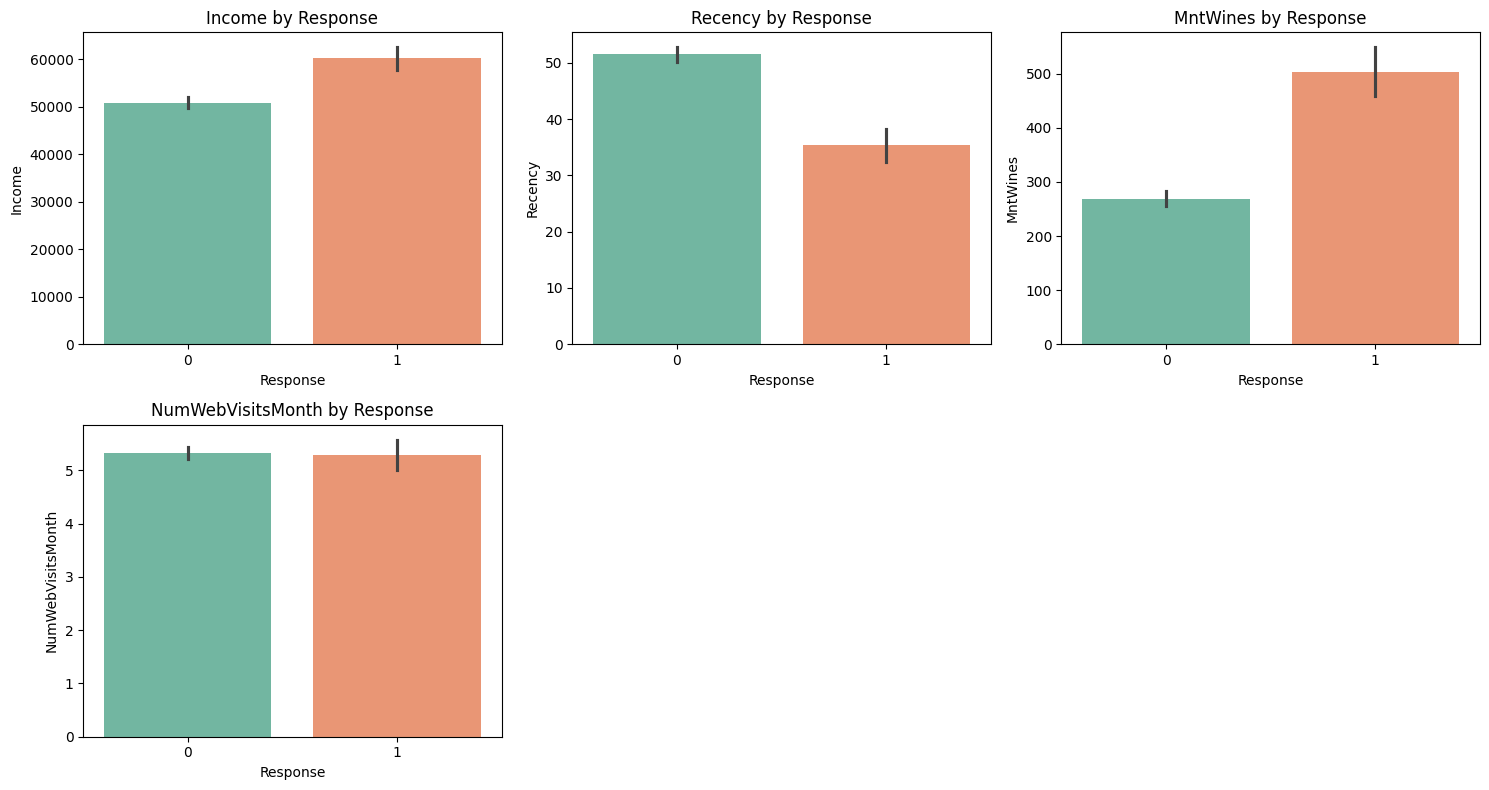

In [14]:
# Define numerical columns for this plot only
num_cols = ['Income', 'Recency', 'MntWines', 'NumWebVisitsMonth']

# Set the number of plots per row
plots_per_row = 3
n_rows = (len(num_cols) + plots_per_row - 1) // plots_per_row  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, plots_per_row, figsize=(5 * plots_per_row, 4 * n_rows))
axes = axes.flatten()  # Flatten in case of multiple rows

# Loop through each numerical column and create a bar plot
for i, col in enumerate(num_cols):
    sns.barplot(data=df, x='Response', y=col, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{col} by Response')
    axes[i].set_xlabel('Response')
    axes[i].set_ylabel(col)

# Hide any unused subplots
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

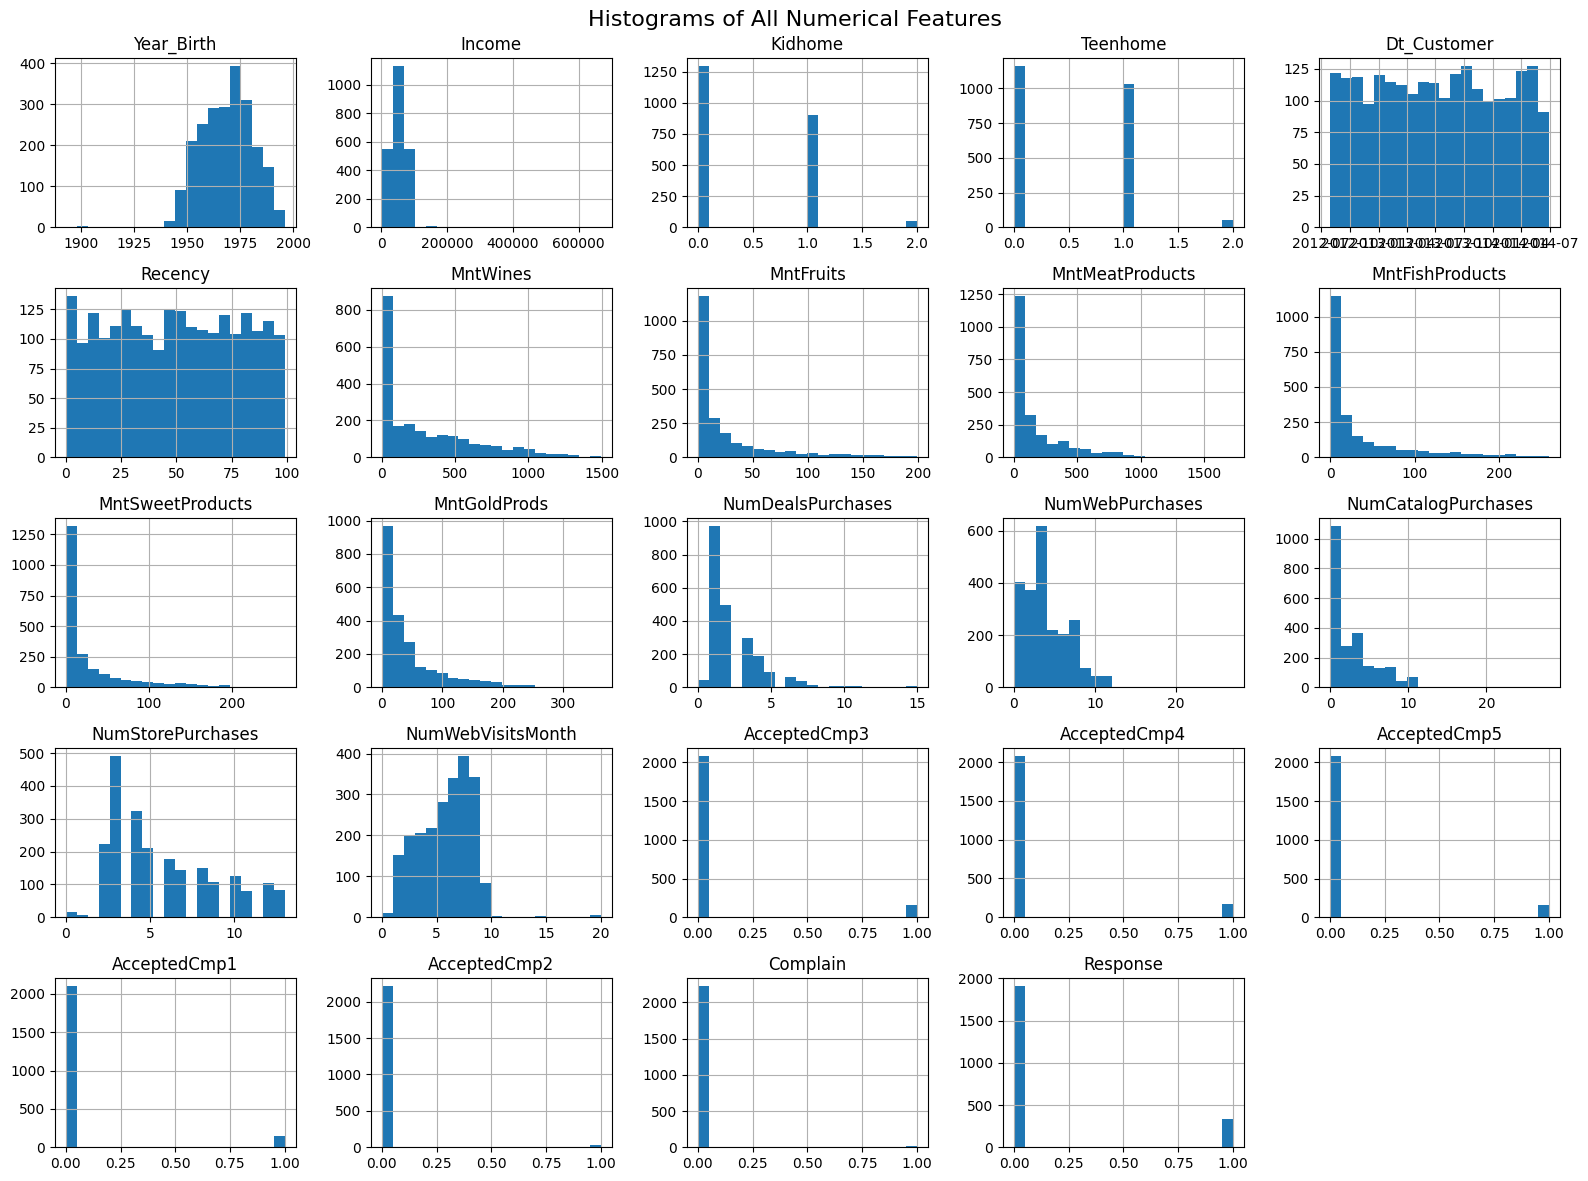

In [15]:
# Histograms
df.hist(figsize=(16, 12), bins=20)
plt.suptitle("Histograms of All Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

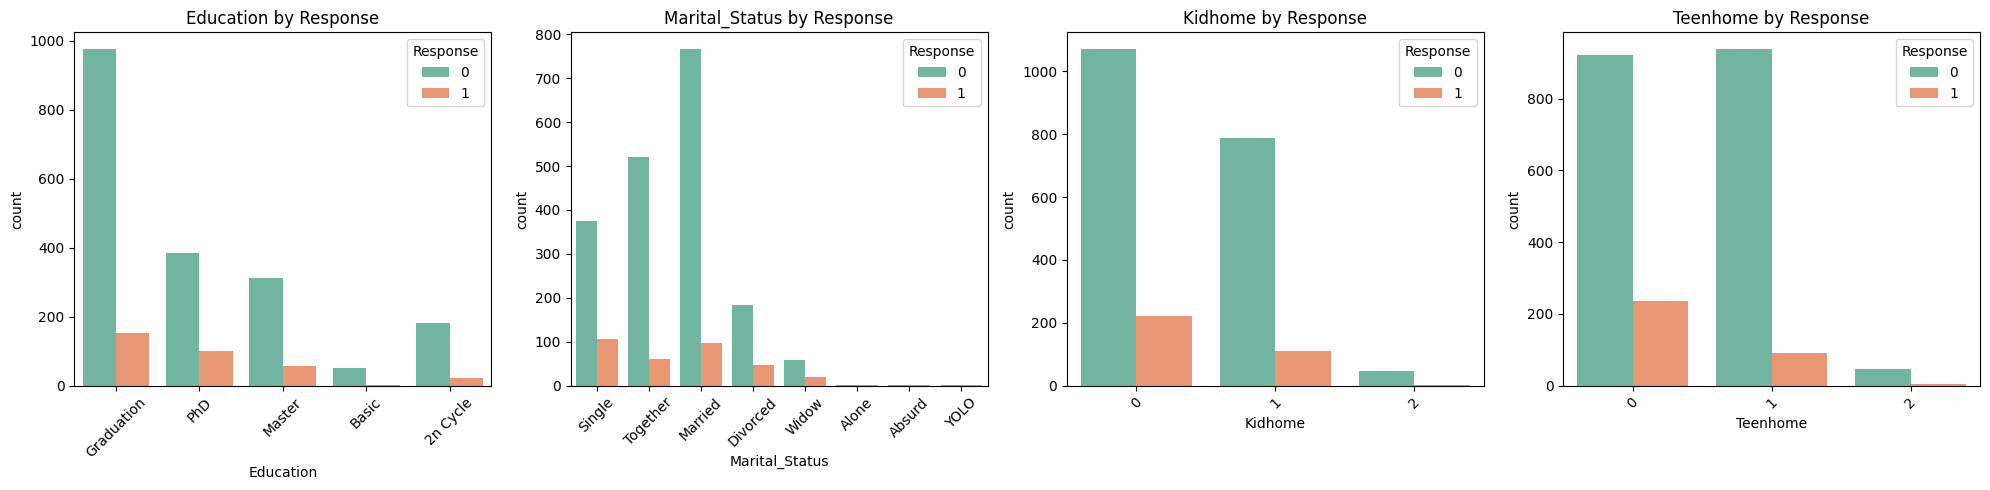

In [16]:
# Define the categorical columns for this plot
cate_cols = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome']

# Set up the plot grid
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Loop through each categorical column and create a countplot
for i, col in enumerate(cate_cols):
    sns.countplot(data=df, x=col, hue='Response', ax=axes[i], palette='Set2')
    axes[i].set_title(f'{col} by Response')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [17]:
# Line Plot (Recency vs Income)
plt.figure(figsize=(8, 5))
sns.lineplot(data=df.sort_values('Recency'), x='Recency', y='Income')
plt.title("Recency vs Income")
plt.show()

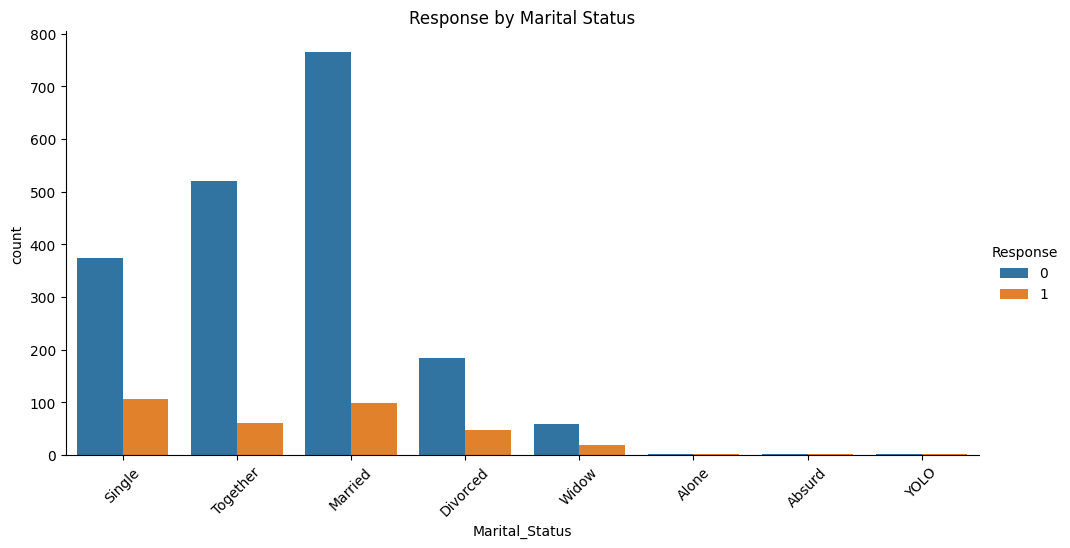

In [18]:
# Catplot (Marital_Status vs Response)
sns.catplot(data=df, x='Marital_Status', hue='Response', kind='count', height=5, aspect=2)
plt.title("Response by Marital Status")
plt.xticks(rotation=45)
plt.show()

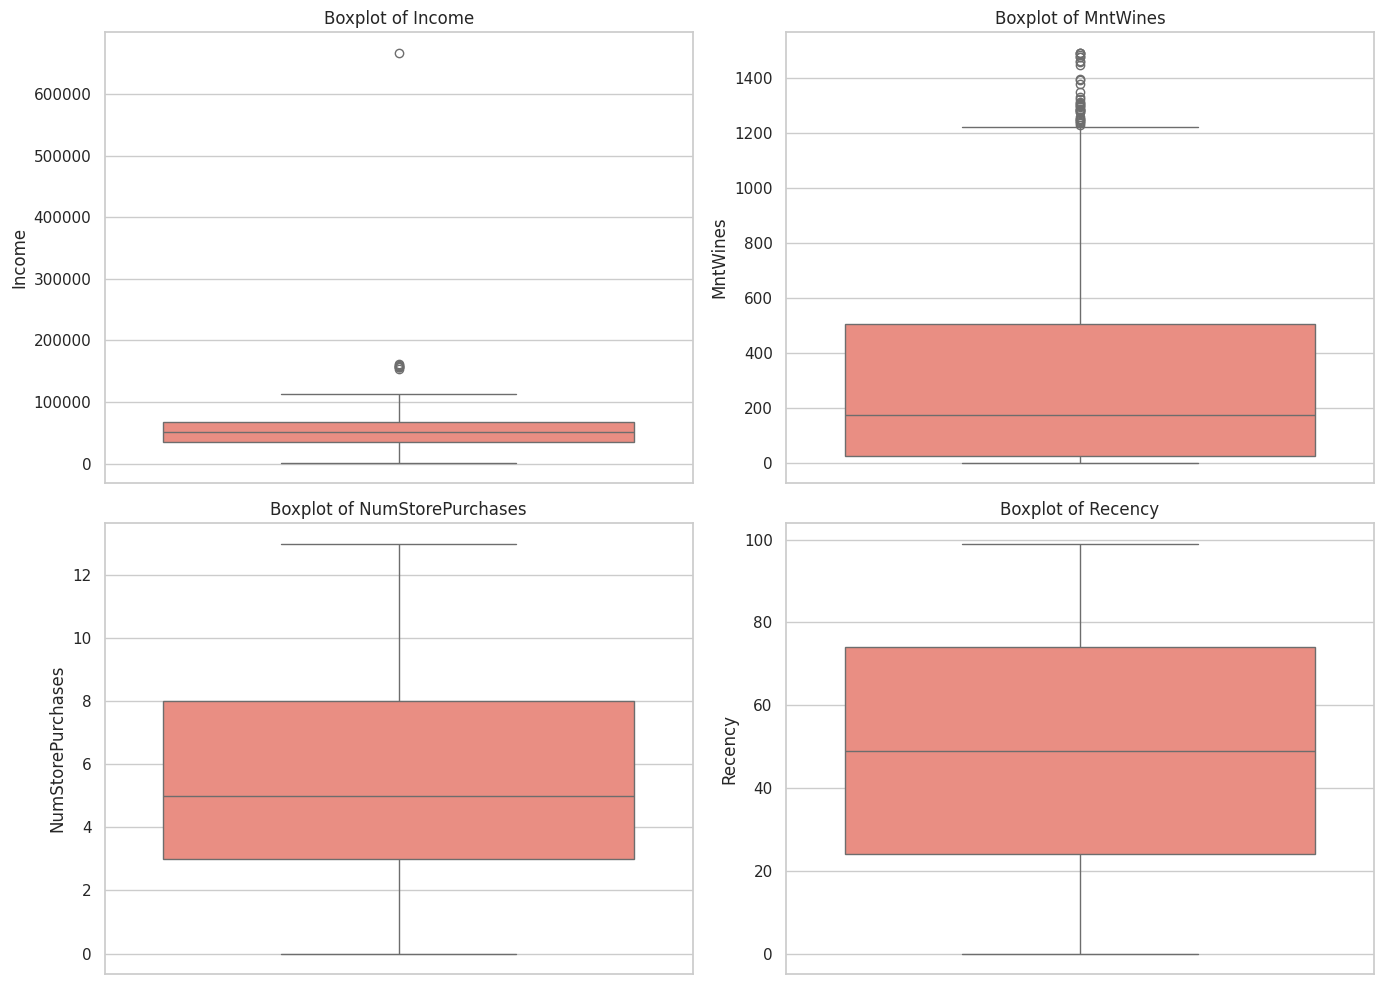

In [19]:
# Define the columns you want to plot
top_cols = ['Income', 'MntWines', 'NumStorePurchases', 'Recency']
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Plot boxplots
for ax, col in zip(axes.flat, top_cols):
    sns.boxplot(y=df[col], ax=ax, color='salmon')
    ax.set_title(f'Boxplot of {col}', fontsize=12)
    ax.set_ylabel(col)
plt.tight_layout()
plt.show()

# Correlation Heatmap (Numerical Features)

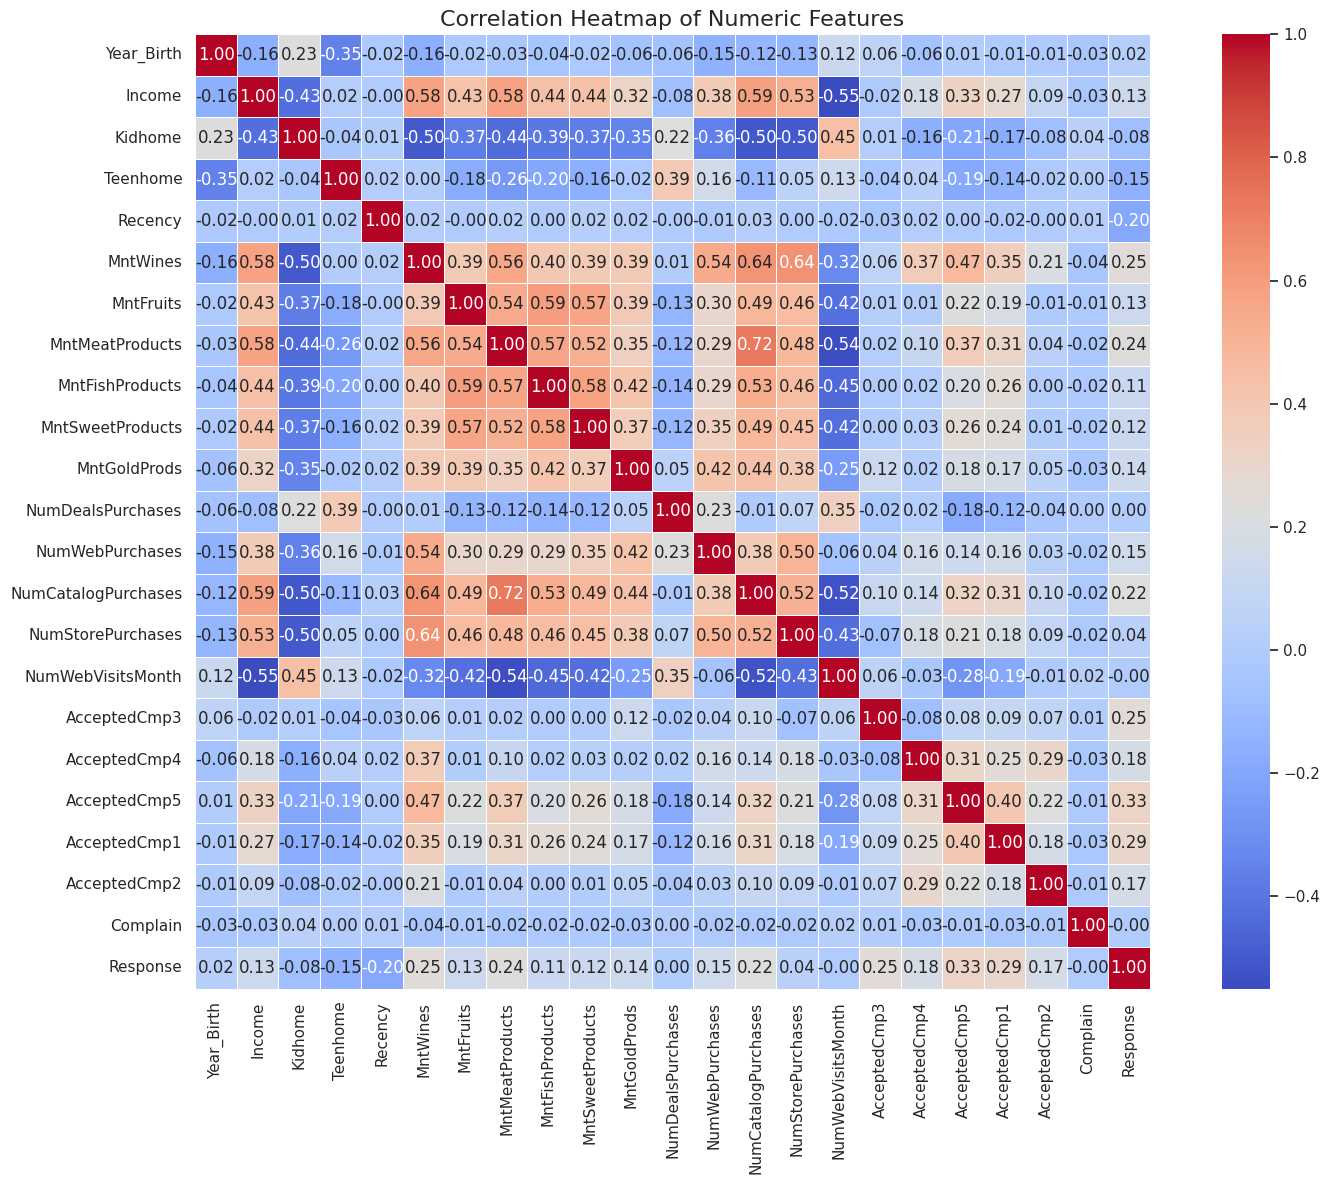

In [20]:
# Compute the correlation matrix (only numeric columns)
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(16, 12))

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=.5)

# Add title
plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

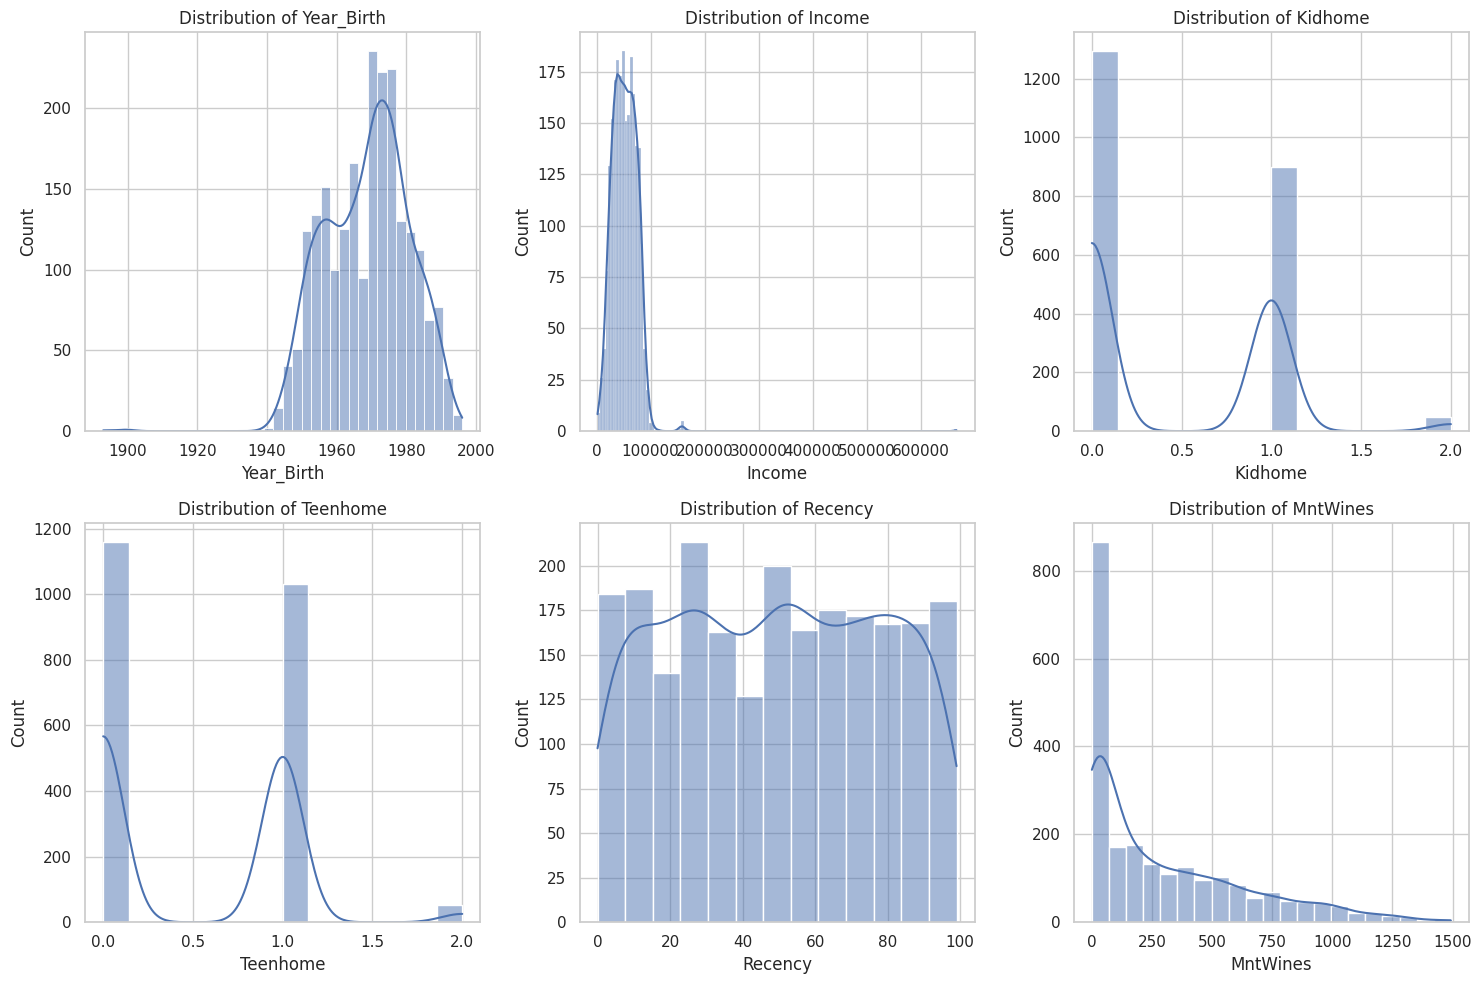

In [21]:
# Histogram of a few scaled numeric variables
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols[:6]):
    plt.subplot(2,3,i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

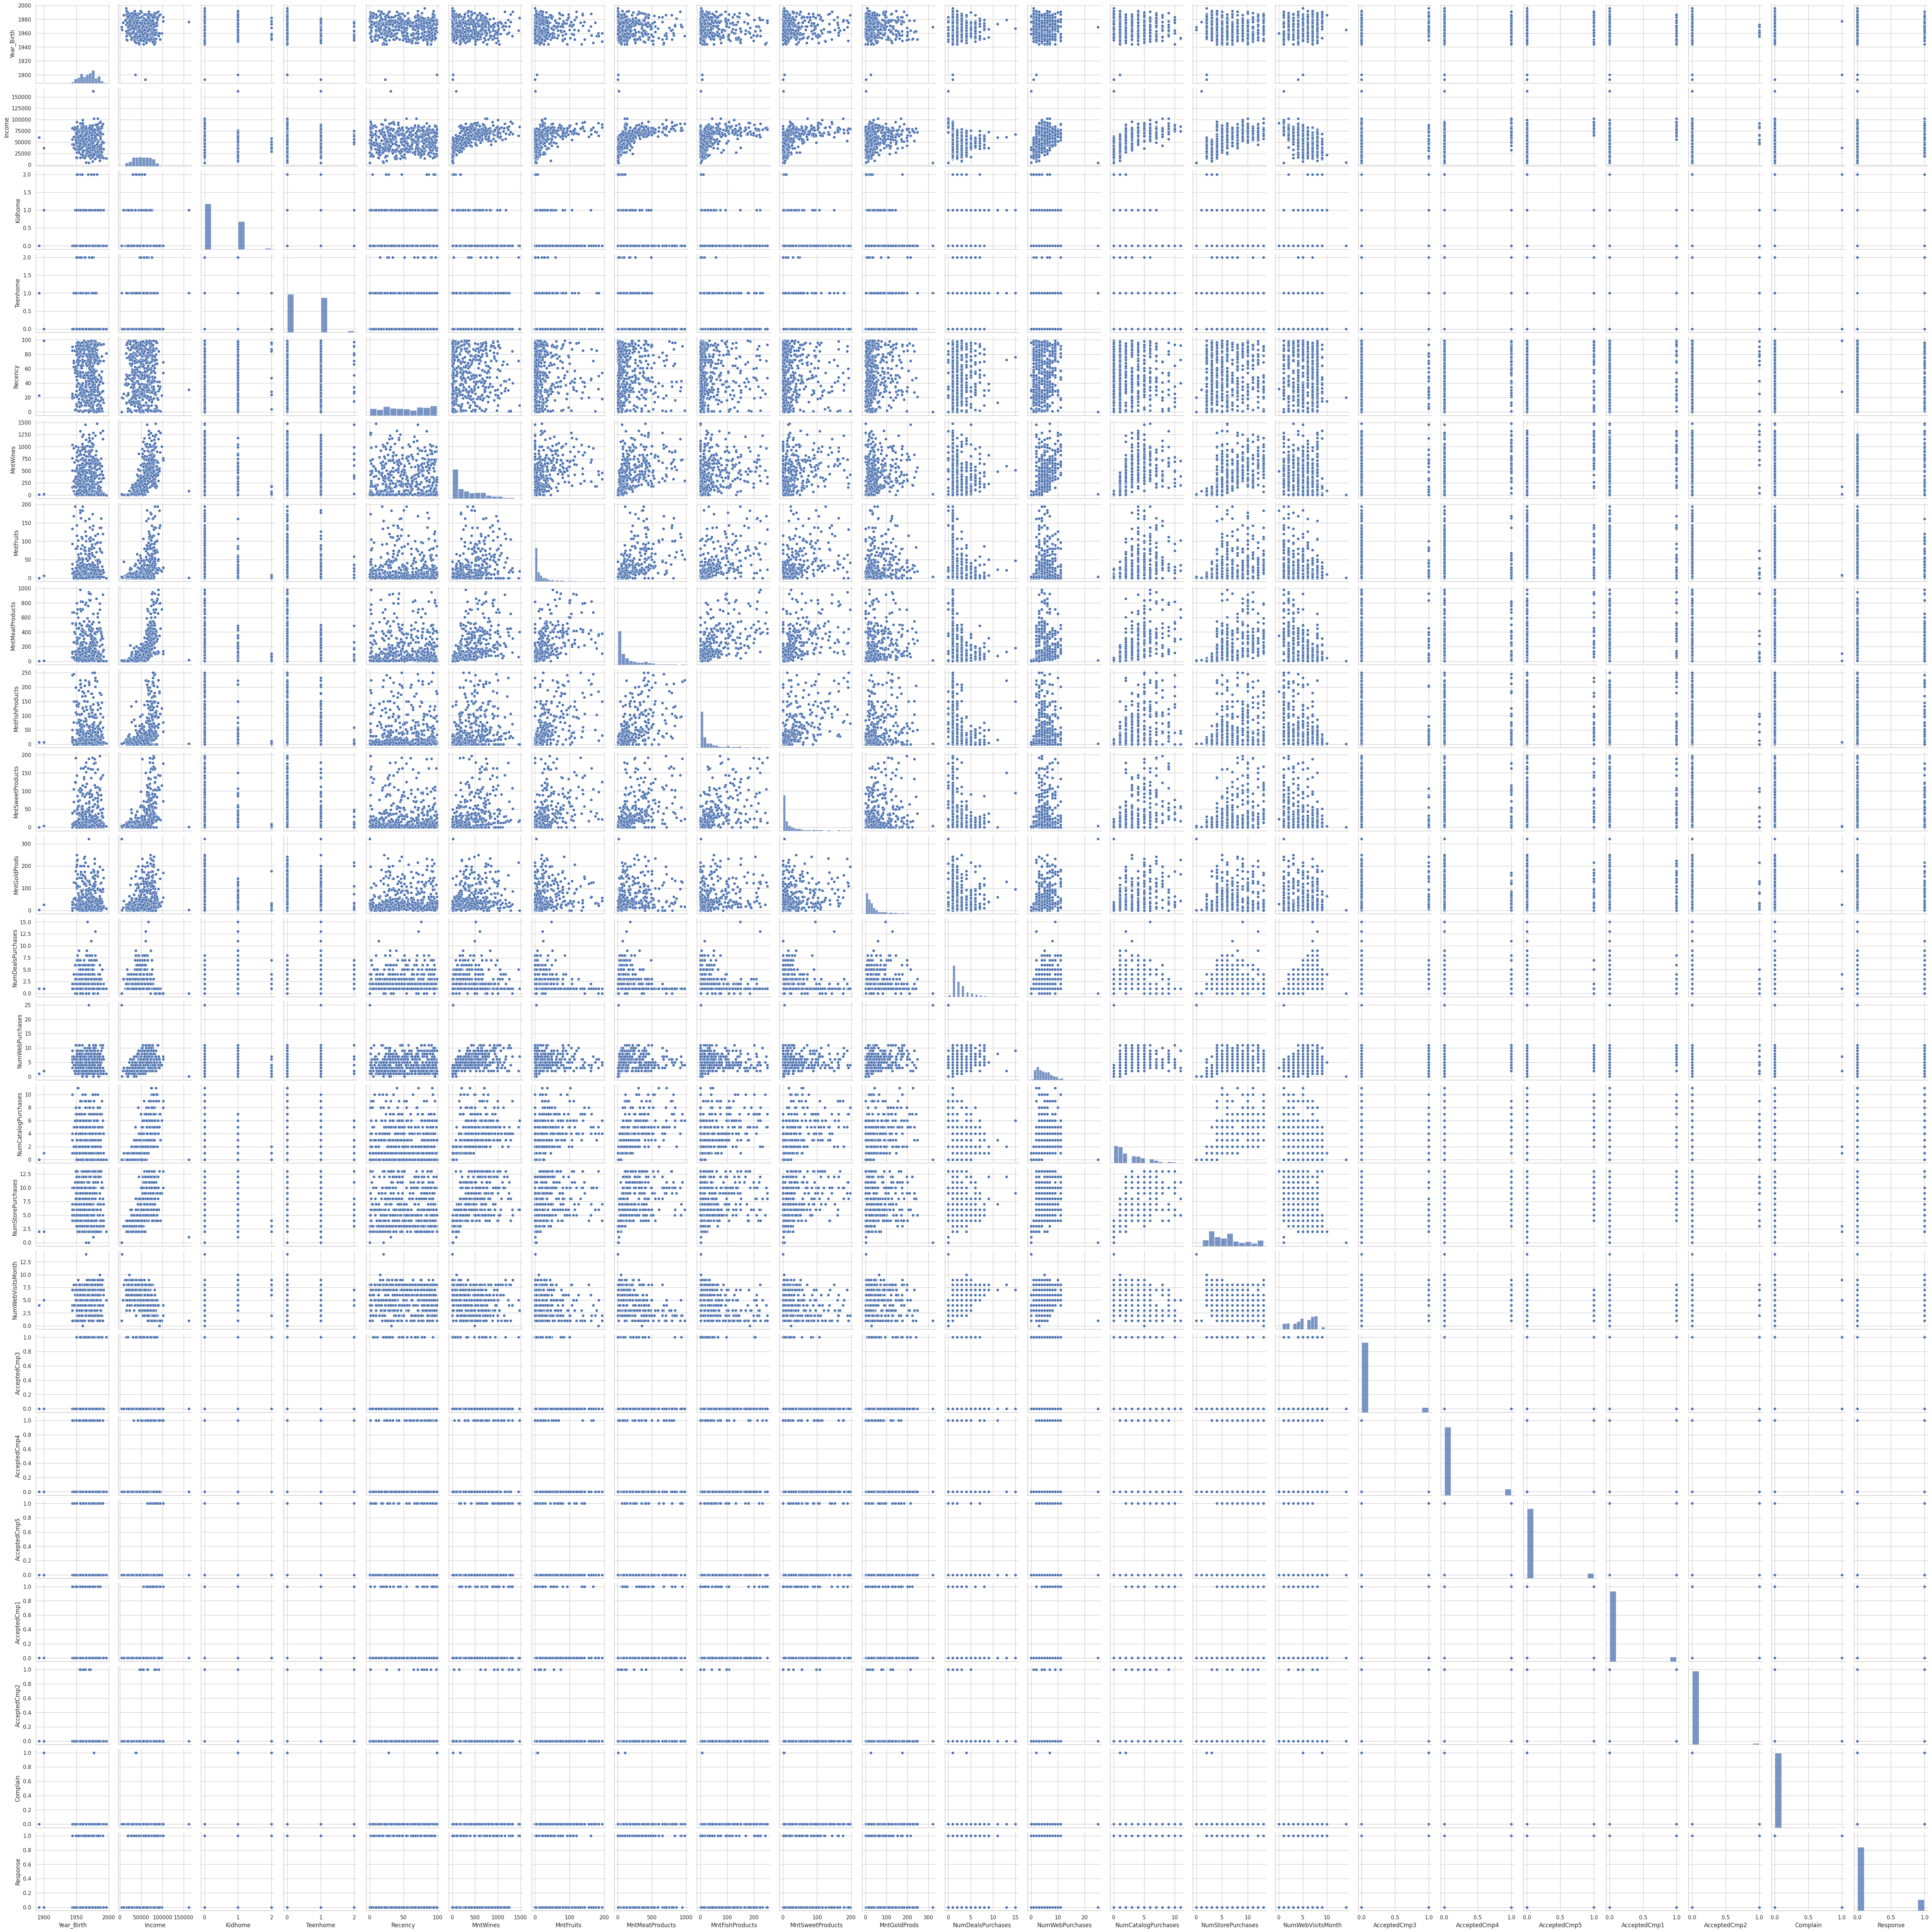

In [22]:
# Pairplot for numerical columns

sns.pairplot(df.sample(500, random_state=42))  # Sampling to reduce rendering time
plt.show()

# Insights

• The dataset has 2,240 customers with 29 features; the goal is to predict Response (whether a customer responded to the campaign).

• Removed non-informative columns: ID (unique identifier), Z_CostContact and Z_Revenue (constant values) to reduce noise.

• Filled missing Income values with the median to keep data consistent and avoid bias.

• No duplicate customers, ensuring data quality.

• Visualizations (scatter, bar plots) show that higher income and purchase amounts (like wine and meat) are linked with positive campaign response.

• Categorical features such as Education, Marital Status, and past campaign acceptances show clear differences between responders and non-responders.

• Correlation heatmap highlights strong relationships between spending and purchase frequency features, useful for feature selection.

• Boxplots and histograms reveal distribution differences, indicating some features vary significantly between responders and non-responders.

• Pairplot confirms clusters and patterns in key numerical variables, helping to understand customer segmentation.

• Overall, demographic info and buying behavior are key to predicting campaign success.

In [23]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Step 2: Initialize and apply LabelEncoder to each column
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoder for inverse_transform if needed

# Step 3: Preview the encoded data
df.head()

Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome  \
0        1957          2               4  58138.0        0         0   
1        1954          2               4  46344.0        1         1   
2        1965          2               5  71613.0        0         0   
3        1984          2               5  26646.0        1         0   
4        1981          4               3  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
0  2012-09-04       58       635         88  ...                   10   
1  2014-03-08       38        11          1  ...                    1   
2  2013-08-21       26       426         49  ...                    2   
3  2014-02-10       26        11          4  ...                    0   
4  2014-01-19       94       173         43  ...                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4                  7             0             0   
1                  2                  5             0             0   
2                 10                  4             0             0   
3                  4                  6             0             0   
4                  6                  5             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0             0             0             0         0         1  
1             0             0             0         0         0  
2             0             0             0         0         0  
3             0             0             0         0         0  
4             0             0             0         0         0  

[5 rows x 26 columns]

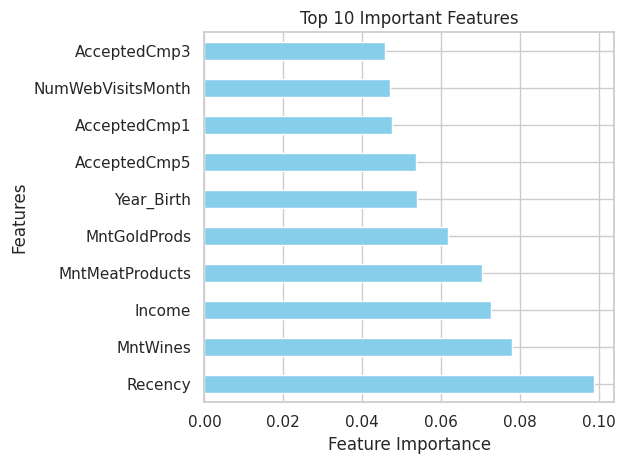

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Drop datetime column (e.g., 'Dt_Customer') before training
X = df.drop(columns=["Response", "Dt_Customer"])  # Replace with actual datetime column name
y = df["Response"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Plot top 10 important features
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind="barh", color="skyblue")
plt.title("Top 10 Important Features")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
df

Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome  \
0           1957          2               4  58138.0        0         0   
1           1954          2               4  46344.0        1         1   
2           1965          2               5  71613.0        0         0   
3           1984          2               5  26646.0        1         0   
4           1981          4               3  58293.0        1         0   
...          ...        ...             ...      ...      ...       ...   
2235        1967          2               3  61223.0        0         1   
2236        1946          4               5  64014.0        2         1   
2237        1981          2               2  56981.0        0         0   
2238        1956          3               5  69245.0        0         1   
2239        1954          4               3  52869.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
0     2012-09-04       58       635         88  ...                   10   
1     2014-03-08       38        11          1  ...                    1   
2     2013-08-21       26       426         49  ...                    2   
3     2014-02-10       26        11          4  ...                    0   
4     2014-01-19       94       173         43  ...                    3   
...          ...      ...       ...        ...  ...                  ...   
2235  2013-06-13       46       709         43  ...                    3   
2236  2014-06-10       56       406          0  ...                    2   
2237  2014-01-25       91       908         48  ...                    3   
2238  2014-01-24        8       428         30  ...                    5   
2239  2012-10-15       40        84          3  ...                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                     4                  7             0             0   
1                     2                  5             0             0   
2                    10                  4             0             0   
3                     4                  6             0             0   
4                     6                  5             0             0   
...                 ...                ...           ...           ...   
2235                  4                  5             0             0   
2236                  5                  7             0             0   
2237                 13                  6             0             1   
2238                 10                  3             0             0   
2239                  4                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0                0             0             0         0         1  
1                0             0             0         0         0  
2                0             0             0         0         0  
3                0             0             0         0         0  
4                0             0             0         0         0  
...            ...           ...           ...       ...       ...  
2235             0             0             0         0         0  
2236             0             1             0         0         0  
2237             0             0             0         0         0  
2238             0             0             0         0         0  
2239             0             0             0         0         1  

[2240 rows x 26 columns]

In [27]:
df = df.drop(columns=['Dt_Customer'])

In [28]:
# Scaling the Data for avoiding uniqueness

scaler = StandardScaler()

scaled_df = scaler.fit_transform(df)

In [29]:
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df

Year_Birth  Education  Marital_Status    Income   Kidhome  Teenhome  \
0      -0.985345  -0.350141        0.251004  0.235696 -0.825218 -0.929894   
1      -1.235733  -0.350141        0.251004 -0.235454  1.032559  0.906934   
2      -0.317643  -0.350141        1.180340  0.773999 -0.825218 -0.929894   
3       1.268149  -0.350141        1.180340 -1.022355  1.032559 -0.929894   
4       1.017761   1.428354       -0.678332  0.241888  1.032559 -0.929894   
...          ...        ...             ...       ...       ...       ...   
2235   -0.150717  -0.350141       -0.678332  0.358936 -0.825218  0.906934   
2236   -1.903435   1.428354        1.180340  0.470432  2.890335  0.906934   
2237    1.017761  -0.350141       -1.607669  0.189476 -0.825218 -0.929894   
2238   -1.068807   0.539106        1.180340  0.679401 -0.825218  0.906934   
2239   -1.235733   1.428354       -0.678332  0.025208  1.032559  0.906934   

       Recency  MntWines  MntFruits  MntMeatProducts  ...  \
0     0.307039  0.983781   1.551577         1.679702  ...   
1    -0.383664 -0.870479  -0.636301        -0.713225  ...   
2    -0.798086  0.362723   0.570804        -0.177032  ...   
3    -0.798086 -0.870479  -0.560857        -0.651187  ...   
4     1.550305 -0.389085   0.419916        -0.216914  ...   
...        ...       ...        ...              ...  ...   
2235 -0.107383  1.203678   0.419916         0.066692  ...   
2236  0.237969  0.303291  -0.661449        -0.606873  ...   
2237  1.446700  1.795020   0.545656         0.221789  ...   
2238 -1.419719  0.368666   0.092992         0.208495  ...   
2239 -0.314594 -0.653555  -0.586005        -0.469501  ...   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                2.510890          -0.550785           0.693904      -0.28014   
1               -0.568720          -1.166125          -0.130463      -0.28014   
2               -0.226541           1.295237          -0.542647      -0.28014   
3               -0.910898          -0.550785           0.281720      -0.28014   
4                0.115638           0.064556          -0.130463      -0.28014   
...                   ...                ...                ...           ...   
2235             0.115638          -0.550785          -0.130463      -0.28014   
2236            -0.226541          -0.243114           0.693904      -0.28014   
2237             0.115638           2.218248           0.281720      -0.28014   
2238             0.799996           1.295237          -0.954831      -0.28014   
2239            -0.568720          -0.550785           0.693904      -0.28014   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0        -0.283830      -0.28014     -0.262111      -0.11651 -0.097282   
1        -0.283830      -0.28014     -0.262111      -0.11651 -0.097282   
2        -0.283830      -0.28014     -0.262111      -0.11651 -0.097282   
3        -0.283830      -0.28014     -0.262111      -0.11651 -0.097282   
4        -0.283830      -0.28014     -0.262111      -0.11651 -0.097282   
...            ...           ...           ...           ...       ...   
2235     -0.283830      -0.28014     -0.262111      -0.11651 -0.097282   
2236     -0.283830      -0.28014      3.815174      -0.11651 -0.097282   
2237      3.523233      -0.28014     -0.262111      -0.11651 -0.097282   
2238     -0.283830      -0.28014     -0.262111      -0.11651 -0.097282   
2239     -0.283830      -0.28014     -0.262111      -0.11651 -0.097282   

      Response  
0     2.388846  
1    -0.418612  
2    -0.418612  
3    -0.418612  
4    -0.418612  
...        ...  
2235 -0.418612  
2236 -0.418612  
2237 -0.418612  
2238 -0.418612  
2239  2.388846  

[2240 rows x 25 columns]

In [30]:
scaled_df['Response'].nunique()

2

In [31]:
if 'Response' in scaled_df.columns:
    selected_df = scaled_df.drop(columns=['Response']).copy()
else:
    selected_df = scaled_df.copy()

selected_df['Response'] = df['Response']
selected_df

Year_Birth  Education  Marital_Status    Income   Kidhome  Teenhome  \
0      -0.985345  -0.350141        0.251004  0.235696 -0.825218 -0.929894   
1      -1.235733  -0.350141        0.251004 -0.235454  1.032559  0.906934   
2      -0.317643  -0.350141        1.180340  0.773999 -0.825218 -0.929894   
3       1.268149  -0.350141        1.180340 -1.022355  1.032559 -0.929894   
4       1.017761   1.428354       -0.678332  0.241888  1.032559 -0.929894   
...          ...        ...             ...       ...       ...       ...   
2235   -0.150717  -0.350141       -0.678332  0.358936 -0.825218  0.906934   
2236   -1.903435   1.428354        1.180340  0.470432  2.890335  0.906934   
2237    1.017761  -0.350141       -1.607669  0.189476 -0.825218 -0.929894   
2238   -1.068807   0.539106        1.180340  0.679401 -0.825218  0.906934   
2239   -1.235733   1.428354       -0.678332  0.025208  1.032559  0.906934   

       Recency  MntWines  MntFruits  MntMeatProducts  ...  \
0     0.307039  0.983781   1.551577         1.679702  ...   
1    -0.383664 -0.870479  -0.636301        -0.713225  ...   
2    -0.798086  0.362723   0.570804        -0.177032  ...   
3    -0.798086 -0.870479  -0.560857        -0.651187  ...   
4     1.550305 -0.389085   0.419916        -0.216914  ...   
...        ...       ...        ...              ...  ...   
2235 -0.107383  1.203678   0.419916         0.066692  ...   
2236  0.237969  0.303291  -0.661449        -0.606873  ...   
2237  1.446700  1.795020   0.545656         0.221789  ...   
2238 -1.419719  0.368666   0.092992         0.208495  ...   
2239 -0.314594 -0.653555  -0.586005        -0.469501  ...   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                2.510890          -0.550785           0.693904      -0.28014   
1               -0.568720          -1.166125          -0.130463      -0.28014   
2               -0.226541           1.295237          -0.542647      -0.28014   
3               -0.910898          -0.550785           0.281720      -0.28014   
4                0.115638           0.064556          -0.130463      -0.28014   
...                   ...                ...                ...           ...   
2235             0.115638          -0.550785          -0.130463      -0.28014   
2236            -0.226541          -0.243114           0.693904      -0.28014   
2237             0.115638           2.218248           0.281720      -0.28014   
2238             0.799996           1.295237          -0.954831      -0.28014   
2239            -0.568720          -0.550785           0.693904      -0.28014   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0        -0.283830      -0.28014     -0.262111      -0.11651 -0.097282   
1        -0.283830      -0.28014     -0.262111      -0.11651 -0.097282   
2        -0.283830      -0.28014     -0.262111      -0.11651 -0.097282   
3        -0.283830      -0.28014     -0.262111      -0.11651 -0.097282   
4        -0.283830      -0.28014     -0.262111      -0.11651 -0.097282   
...            ...           ...           ...           ...       ...   
2235     -0.283830      -0.28014     -0.262111      -0.11651 -0.097282   
2236     -0.283830      -0.28014      3.815174      -0.11651 -0.097282   
2237      3.523233      -0.28014     -0.262111      -0.11651 -0.097282   
2238     -0.283830      -0.28014     -0.262111      -0.11651 -0.097282   
2239     -0.283830      -0.28014     -0.262111      -0.11651 -0.097282   

      Response  
0            1  
1            0  
2            0  
3            0  
4            0  
...        ...  
2235         0  
2236         0  
2237         0  
2238         0  
2239         1  

[2240 rows x 25 columns]

In [32]:

# Compute correlation with the 'Response' variable
correlation_with_response = selected_df.corr()['Response'].sort_values(ascending=False)

# Drop the correlation of 'Response' with itself (which is always 1)
correlation_with_response = correlation_with_response.drop('Response')

# Print the correlation values
print("Correlation of Features with 'Response':\n")
print(correlation_with_response)

# Optional: Select features based on a correlation threshold
# For example, select features with an absolute correlation greater than 0.1
correlation_threshold = 0.1
important_features = correlation_with_response[abs(correlation_with_response) > correlation_threshold]

print(f"\nImportant Features (Absolute Correlation > {correlation_threshold}):\n")
print(important_features)

# Optional: Visualize the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=important_features.index, y=important_features.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Important Features by Correlation with Response')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.tight_layout()
plt.show()
print("\nSelected features shape:", selected_df.shape)
selected_df.head()

Correlation of Features with 'Response':

AcceptedCmp5           0.326634
AcceptedCmp1           0.293982
AcceptedCmp3           0.254258
MntWines               0.247254
MntMeatProducts        0.236335
NumCatalogPurchases    0.220810
AcceptedCmp4           0.177019
AcceptedCmp2           0.169293
NumWebPurchases        0.148730
MntGoldProds           0.139850
Income                 0.132867
MntFruits              0.125289
MntSweetProducts       0.117372
MntFishProducts        0.111331
Education              0.090819
NumStorePurchases      0.039363
Year_Birth             0.021325
NumDealsPurchases      0.002238
Complain              -0.001707
NumWebVisitsMonth     -0.003987
Marital_Status        -0.011403
Kidhome               -0.080008
Teenhome              -0.154446
Recency               -0.198437
Name: Response, dtype: float64

Important Features (Absolute Correlation > 0.1):

AcceptedCmp5           0.326634
AcceptedCmp1           0.293982
AcceptedCmp3           0.254258
MntWines    


Selected features shape: (2240, 25)


Year_Birth  Education  Marital_Status    Income   Kidhome  Teenhome  \
0   -0.985345  -0.350141        0.251004  0.235696 -0.825218 -0.929894   
1   -1.235733  -0.350141        0.251004 -0.235454  1.032559  0.906934   
2   -0.317643  -0.350141        1.180340  0.773999 -0.825218 -0.929894   
3    1.268149  -0.350141        1.180340 -1.022355  1.032559 -0.929894   
4    1.017761   1.428354       -0.678332  0.241888  1.032559 -0.929894   

    Recency  MntWines  MntFruits  MntMeatProducts  ...  NumCatalogPurchases  \
0  0.307039  0.983781   1.551577         1.679702  ...             2.510890   
1 -0.383664 -0.870479  -0.636301        -0.713225  ...            -0.568720   
2 -0.798086  0.362723   0.570804        -0.177032  ...            -0.226541   
3 -0.798086 -0.870479  -0.560857        -0.651187  ...            -0.910898   
4  1.550305 -0.389085   0.419916        -0.216914  ...             0.115638   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0          -0.550785           0.693904      -0.28014      -0.28383   
1          -1.166125          -0.130463      -0.28014      -0.28383   
2           1.295237          -0.542647      -0.28014      -0.28383   
3          -0.550785           0.281720      -0.28014      -0.28383   
4           0.064556          -0.130463      -0.28014      -0.28383   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0      -0.28014     -0.262111      -0.11651 -0.097282         1  
1      -0.28014     -0.262111      -0.11651 -0.097282         0  
2      -0.28014     -0.262111      -0.11651 -0.097282         0  
3      -0.28014     -0.262111      -0.11651 -0.097282         0  
4      -0.28014     -0.262111      -0.11651 -0.097282         0  

[5 rows x 25 columns]

Top 15 Most Important Features:
                Feature  Importance (%)
6               Recency       12.246718
20         AcceptedCmp5       11.156169
9       MntMeatProducts        6.737338
3                Income        6.602919
18         AcceptedCmp3        6.417938
7              MntWines        5.404887
0            Year_Birth        5.318432
12         MntGoldProds        5.079276
21         AcceptedCmp1        4.809058
17    NumWebVisitsMonth        4.477848
11     MntSweetProducts        4.267636
15  NumCatalogPurchases        4.108802
13    NumDealsPurchases        3.598991
10      MntFishProducts        3.516117
16    NumStorePurchases        3.211752


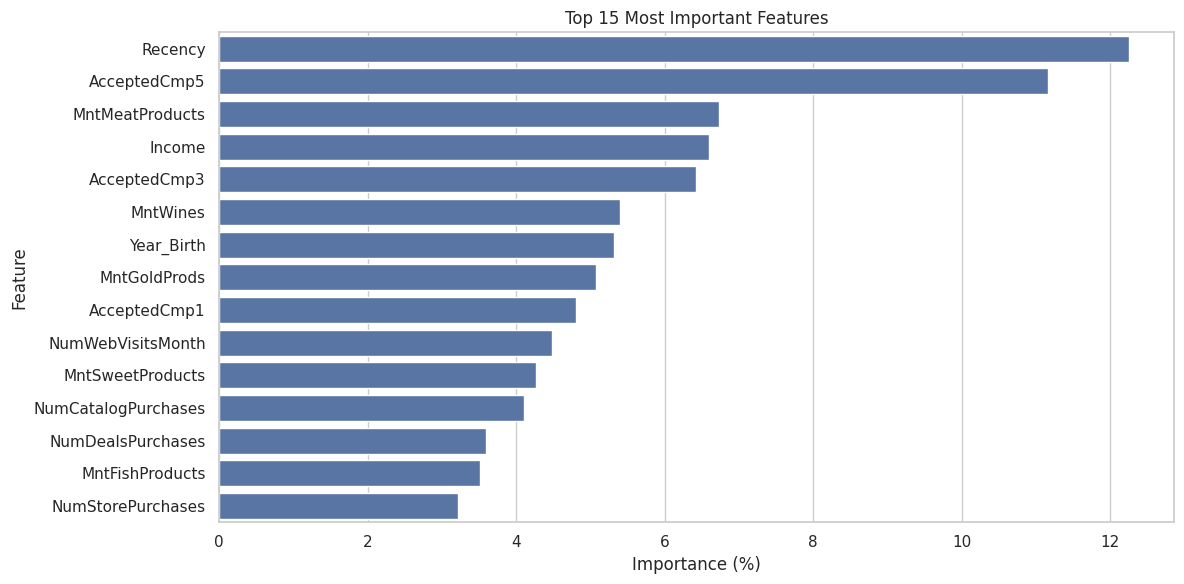

In [33]:
# Import required libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prepare features (X) and target (y)
X = scaled_df.drop(columns=['Response'])  # Use scaled features
y = df['Response']  # Use original churn values from unscaled data

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Calculate and display feature importance in percentages
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance (%)': rf_model.feature_importances_ * 100
})

# Sort features by importance
feature_importance = feature_importance.sort_values('Importance (%)', ascending=False)

# Display top features
print("Top 15 Most Important Features:")
print(feature_importance.head(15))

# Visualize feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance (%)', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Most Important Features')
plt.tight_layout()
plt.show()

In [34]:
# Select top 10 most important features based on Random Forest
top_features = feature_importance['Feature'].head(10).tolist()

# Add target variable 'Response' to the list of selected features
top_features.append('Response')

# Create new dataframe with selected important features
selected_f_df = scaled_df[top_features]

print("\nSelected important features shape:", selected_f_df.shape)
selected_f_df.head()


Selected important features shape: (2240, 11)


Recency  AcceptedCmp5  MntMeatProducts    Income  AcceptedCmp3  MntWines  \
0  0.307039      -0.28014         1.679702  0.235696      -0.28014  0.983781   
1 -0.383664      -0.28014        -0.713225 -0.235454      -0.28014 -0.870479   
2 -0.798086      -0.28014        -0.177032  0.773999      -0.28014  0.362723   
3 -0.798086      -0.28014        -0.651187 -1.022355      -0.28014 -0.870479   
4  1.550305      -0.28014        -0.216914  0.241888      -0.28014 -0.389085   

   Year_Birth  MntGoldProds  AcceptedCmp1  NumWebVisitsMonth  Response  
0   -0.985345      0.843207     -0.262111           0.693904  2.388846  
1   -1.235733     -0.729006     -0.262111          -0.130463 -0.418612  
2   -0.317643     -0.038766     -0.262111          -0.542647 -0.418612  
3    1.268149     -0.748179     -0.262111           0.281720 -0.418612  
4    1.017761     -0.556446     -0.262111          -0.130463 -0.418612

In [35]:
# Classification Model Building
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import warnings
warnings.filterwarnings("ignore")

# Store classification model results
clustering_scores = {}

# Automating Clustering Model Training & Evaluation
def clustering_prediction(model, model_name, X):
    print(f"Model: {model_name}")

    # Fit model and get cluster labels
    try:
        model.fit(X)
        if hasattr(model, 'labels_'):
            labels = model.labels_
        else:
            labels = model.predict(X)
    except Exception as e:
        print(f"Error during model fitting: {e}")
        return

    # Display number of clusters (excluding noise if present)
    unique_labels = set(labels)
    n_clusters = len(unique_labels) - (1 if -1 in labels else 0)
    print(f"Number of clusters: {n_clusters}")

    # Evaluation (only if more than 1 cluster is found)
    if len(set(labels)) > 1:
        try:
            silhouette = silhouette_score(X, labels)
            db_score = davies_bouldin_score(X, labels)
            ch_score = calinski_harabasz_score(X, labels)

            print(f"Silhouette Score: {silhouette:.3f}")
            print(f"Davies-Bouldin Score: {db_score:.3f}")
            print(f"Calinski-Harabasz Score: {ch_score:.3f}")
        except Exception as e:
            print(f"Metric evaluation skipped: {e}")
    else:
        print("Cannot evaluate metrics (only one cluster detected).")

# Prepare the data (using the previously selected features if you want to try classification on them)
# Otherwise, use the original scaled_df features
X = selected_df.drop(columns=['Response'])
y = df['Response'] # Use original target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Use stratify for classification


In [36]:

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score # Import clustering metrics

clustering_prediction(KMeans(n_clusters=5, random_state=42, n_init=10), "K-Means Clustering", scaled_df) # Pass scaled_df as X
clustering_prediction(AgglomerativeClustering(n_clusters=5), "Agglomerative Clustering", scaled_df) # Pass scaled_df as X
clustering_prediction(DBSCAN(eps=0.5, min_samples=5), "DBSCAN", scaled_df) # Pass scaled_df as X
clustering_prediction(GaussianMixture(n_components=5, random_state=42), "Gaussian Mixture", scaled_df) # Pass scaled_df as X
clustering_prediction(IsolationForest(n_estimators=100, random_state=42), "Isolation Forest", scaled_df) # Pass scaled_df as X
clustering_prediction(OneClassSVM(nu=0.05), "One-Class SVM", scaled_df) # Pass scaled_df as X




Model: K-Means Clustering
Number of clusters: 5
Silhouette Score: 0.175
Davies-Bouldin Score: 1.883
Calinski-Harabasz Score: 303.051
Model: Agglomerative Clustering
Number of clusters: 5
Silhouette Score: 0.152
Davies-Bouldin Score: 1.727
Calinski-Harabasz Score: 270.694
Model: DBSCAN
Number of clusters: 0
Cannot evaluate metrics (only one cluster detected).
Model: Gaussian Mixture
Number of clusters: 5
Silhouette Score: 0.076
Davies-Bouldin Score: 2.446
Calinski-Harabasz Score: 217.228
Model: Isolation Forest
Number of clusters: 1
Silhouette Score: 0.303
Davies-Bouldin Score: 2.271
Calinski-Harabasz Score: 280.606
Model: One-Class SVM
Number of clusters: 1
Silhouette Score: 0.353
Davies-Bouldin Score: 3.725
Calinski-Harabasz Score: 60.150


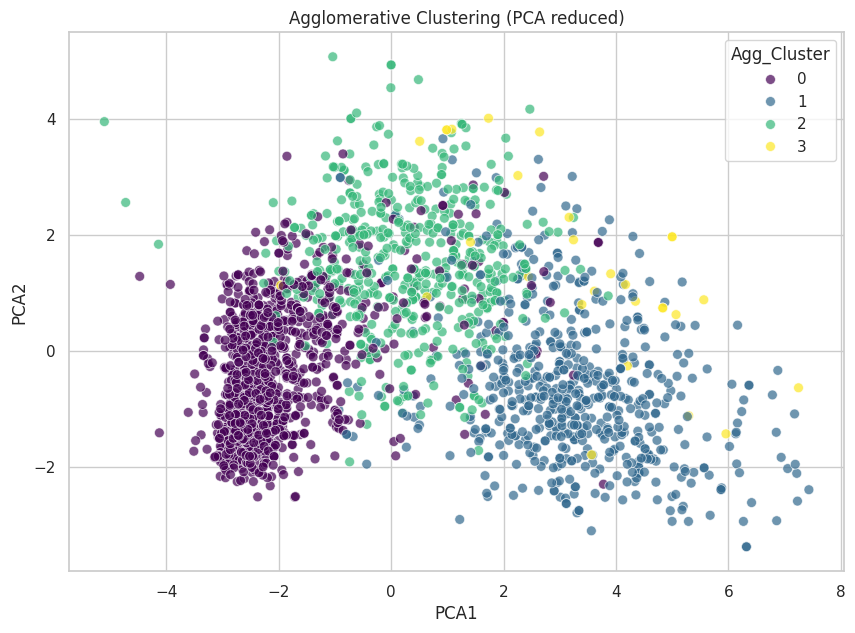

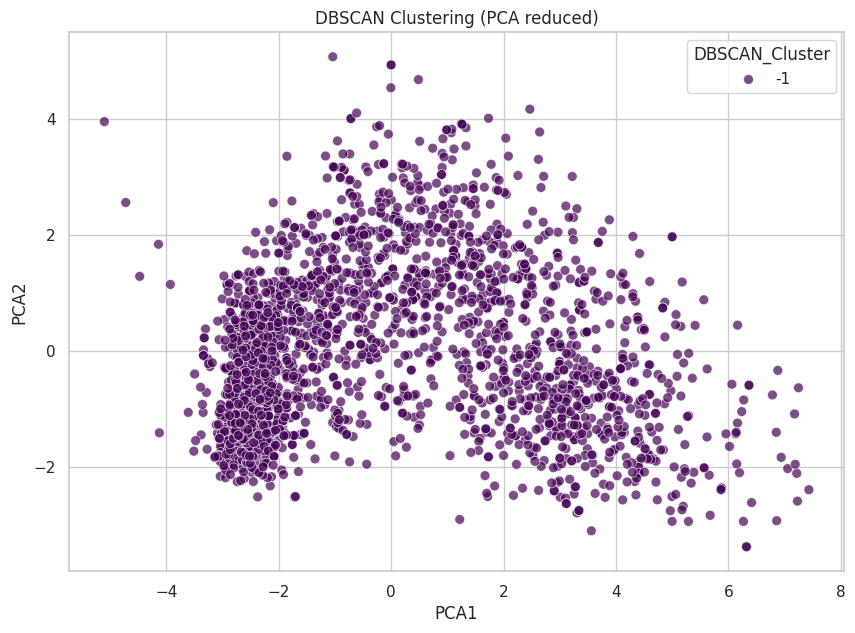

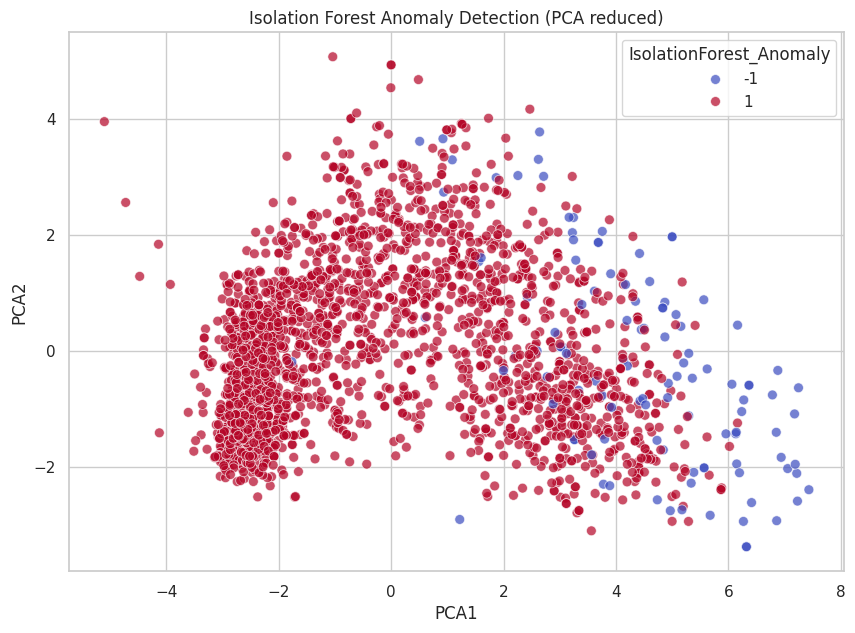

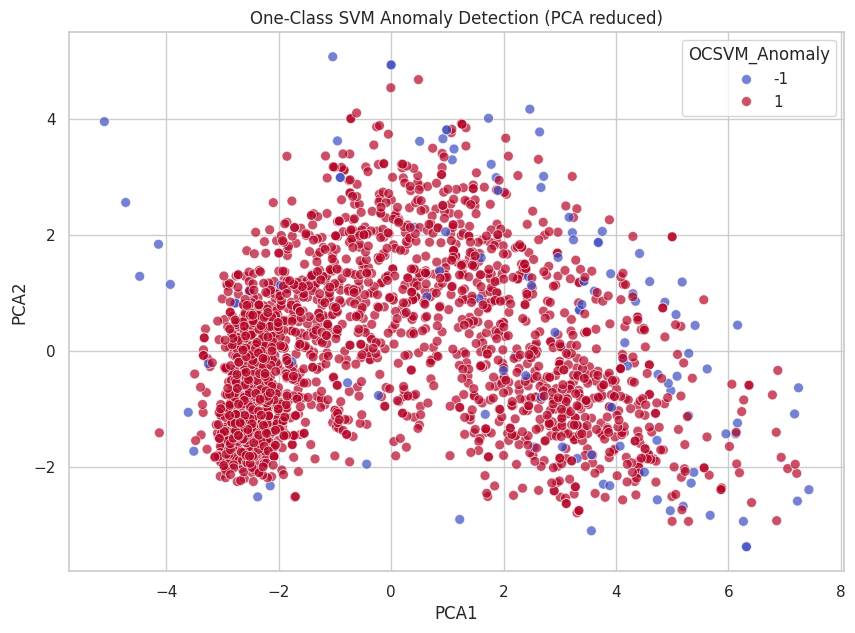

In [38]:
X_clustering = scaled_df.drop(columns=['Response'])

# -------------------- PCA for Visualization --------------------
from sklearn.decomposition import PCA # Import PCA class
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clustering)

# Copy for plotting
scaled_df_viz = scaled_df.copy()
scaled_df_viz['PCA1'] = X_pca[:, 0]
scaled_df_viz['PCA2'] = X_pca[:, 1]

# -------------------- KMeans Clustering --------------------
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_clustering)
scaled_df_viz['KMeans_Cluster'] = kmeans_labels

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', data=scaled_df_viz, palette='viridis', s=50, alpha=0.7)
plt.title('K-Means Clustering (PCA reduced)')
plt.grid(True)
plt.show()

# -------------------- Agglomerative Clustering --------------------
agg = AgglomerativeClustering(n_clusters=4)
agg_labels = agg.fit_predict(X_clustering)
scaled_df_viz['Agg_Cluster'] = agg_labels

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Agg_Cluster', data=scaled_df_viz, palette='viridis', s=50, alpha=0.7)
plt.title('Agglomerative Clustering (PCA reduced)')
plt.grid(True)
plt.show()

# -------------------- DBSCAN Clustering --------------------
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_clustering)
scaled_df_viz['DBSCAN_Cluster'] = dbscan_labels

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='DBSCAN_Cluster', data=scaled_df_viz, palette='viridis', s=50, alpha=0.7)
plt.title('DBSCAN Clustering (PCA reduced)')
plt.grid(True)
plt.show()

# -------------------- Isolation Forest (Anomaly Detection) --------------------
iso = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
iso_labels = iso.fit_predict(X_clustering)
scaled_df_viz['IsolationForest_Anomaly'] = iso_labels

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='IsolationForest_Anomaly', data=scaled_df_viz, palette='coolwarm', s=50, alpha=0.7)
plt.title('Isolation Forest Anomaly Detection (PCA reduced)')
plt.grid(True)
plt.show()

# -------------------- One-Class SVM (Anomaly Detection) --------------------
ocsvm = OneClassSVM(kernel='rbf', nu=0.05, gamma='scale')
ocsvm_labels = ocsvm.fit_predict(X_clustering)
scaled_df_viz['OCSVM_Anomaly'] = ocsvm_labels

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='OCSVM_Anomaly', data=scaled_df_viz, palette='coolwarm', s=50, alpha=0.7)
plt.title('One-Class SVM Anomaly Detection (PCA reduced)')
plt.grid(True)
plt.show()

In [39]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
import numpy as np

# Define clustering models and parameter grids
clustering_models = {
    'KMeans': (KMeans, {
        'n_clusters': range(2, 11),
        'init': ['k-means++', 'random'],
        'n_init': [10, 20, 30],
        'max_iter': [100, 300, 500],
        'tol': [1e-4, 1e-3],
        'algorithm': ['lloyd']  # 'auto' is deprecated
    }),
    'AgglomerativeClustering': (AgglomerativeClustering, {
        'n_clusters': range(2, 11),
        'affinity': ['euclidean', 'cosine'],
        'linkage': ['ward', 'complete', 'average', 'single']
    }),
    'DBSCAN': (DBSCAN, {
        'eps': np.arange(0.1, 1.0, 0.1),
        'min_samples': range(5, 21),
        'metric': ['euclidean', 'cosine']
    }),
    'IsolationForest': (IsolationForest, {
        'n_estimators': [50, 100, 200],
        'max_samples': ['auto', 0.6, 0.8, 1.0],
        'contamination': [0.01, 0.05, 0.1],
        'max_features': [0.5, 0.75, 1.0],
        'bootstrap': [False, True]
    }),
    'OneClassSVM': (OneClassSVM, {
        'kernel': ['rbf', 'sigmoid', 'poly'],
        'gamma': ['scale', 'auto'],
        'nu': [0.01, 0.05, 0.1, 0.2]
    })
}

# Model class references for instantiation
model_cls = {
    'KMeans': KMeans,
    'AgglomerativeClustering': AgglomerativeClustering,
    'DBSCAN': DBSCAN,
    'IsolationForest': IsolationForest,
    'OneClassSVM': OneClassSVM
}


In [49]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import numpy as np
import pandas as pd
import random

def tune_and_evaluate_clustering_models(models, param_grids, X, cv=3, n_iter=10, scoring_metric='silhouette'):

    results = []
    best_models = {}

    scoring_funcs = {
        'silhouette': silhouette_score,
        'calinski_harabasz': calinski_harabasz_score,
        'davies_bouldin': davies_bouldin_score
    }

    if scoring_metric not in scoring_funcs:
        raise ValueError(f"Unsupported scoring_metric: {scoring_metric}")

    score_func = scoring_funcs[scoring_metric]
    greater_is_better = scoring_metric != 'davies_bouldin'  # DB index is better when lower

    for model_name in models:
        print(f"\n--- Hyperparameter tuning for {model_name} ---")
        model_class = models[model_name]

        if model_name in param_grids and isinstance(param_grids[model_name], tuple) and len(param_grids[model_name]) == 2:
            param_grid = param_grids[model_name][1]
        elif model_name in param_grids and isinstance(param_grids[model_name], dict):
            param_grid = param_grids[model_name]
        else:
            print(f"Warning: Parameter grid not found or in unexpected format for {model_name}. Skipping tuning.")
            continue

        best_score = -np.inf if greater_is_better else np.inf
        best_params = None
        best_model = None

        if not param_grid:
            print(f"Warning: No parameters defined for tuning {model_name}. Skipping tuning.")
            continue

        for i in range(n_iter):
            params = {}
            try:
                if model_name == 'AgglomerativeClustering' and 'linkage' in param_grid and 'affinity' in param_grid:
                    linkage_options = list(param_grid['linkage'])
                    affinity_options = list(param_grid['affinity'])

                    sampled_linkage = random.choice(linkage_options)
                    params['linkage'] = sampled_linkage

                    if sampled_linkage == 'ward':
                        params['affinity'] = 'euclidean'
                    else:
                        params['affinity'] = random.choice([aff for aff in affinity_options if aff != 'euclidean'] + ['euclidean'])

                    for k, v in param_grid.items():
                        if k not in ['linkage', 'affinity']:
                            params[k] = random.choice(list(v)) if hasattr(v, '__iter__') and not isinstance(v, str) else v

                else:
                    params = {k: random.choice(list(v)) if hasattr(v, '__iter__') and not isinstance(v, str) else v for k, v in param_grid.items()}

            except Exception as e:
                print(f"Error sampling parameters for {model_name}: {e}")
                continue

            try:
                model_instance = model_class(**params)

                # Special handling for IsolationForest and OneClassSVM
                if model_name in ['IsolationForest', 'OneClassSVM']:
                    # predict returns 1 for inliers, -1 for outliers
                    pred = model_instance.fit_predict(X)
                    # Map inliers (1) -> 0 and outliers (-1) -> 1 to form two clusters
                    labels = np.where(pred == 1, 0, 1)
                else:
                    labels = model_instance.fit_predict(X)

                mask = labels != -1
                if np.sum(mask) == 0 or len(set(labels[mask])) <= 1:
                    continue

                X_masked = X[mask] if isinstance(X, np.ndarray) else X.iloc[mask]

                score = score_func(X_masked, labels[mask])

                improved = (score > best_score) if greater_is_better else (score < best_score)
                if improved:
                    best_score = score
                    best_params = params
                    best_model = model_instance

                print(f"Params: {params}, {scoring_metric} score: {score:.4f}")

            except Exception as e:
                print(f"Skipping parameters {params} due to error during fitting or scoring: {e}")

        if best_model is not None:
            best_models[model_name] = best_model
            results.append({
                "Model": model_name,
                "Best Score": best_score,
                "Best Parameters": best_params
            })
            print(f"\nBest parameters for {model_name}: {best_params}")
            print(f"Best {scoring_metric} score: {best_score:.4f}")
        else:
            print(f"No valid model found for {model_name} during tuning.")

        print("-" * 40)

    return best_models, results


In [64]:

# Run the hyperparameter tuning for clustering models
best_clustering_models, clustering_tuning_results = tune_and_evaluate_clustering_models(
    model_cls,
    clustering_models,
    scaled_df,
    n_iter=3,
    scoring_metric='silhouette'
)

# Convert the results list of dicts to a DataFrame
clustering_results_df = pd.DataFrame(clustering_tuning_results)


--- Hyperparameter tuning for KMeans ---
Params: {'n_clusters': 4, 'init': 'random', 'n_init': 10, 'max_iter': 1000, 'tol': 1e-05, 'algorithm': 'lloyd'}, silhouette score: 0.1676
Params: {'n_clusters': 8, 'init': 'random', 'n_init': 10, 'max_iter': 500, 'tol': 0.0001, 'algorithm': 'lloyd'}, silhouette score: 0.1017
Params: {'n_clusters': 2, 'init': 'random', 'n_init': 20, 'max_iter': 1000, 'tol': 0.001, 'algorithm': 'lloyd'}, silhouette score: 0.2420

Best parameters for KMeans: {'n_clusters': 2, 'init': 'random', 'n_init': 20, 'max_iter': 1000, 'tol': 0.001, 'algorithm': 'lloyd'}
Best silhouette score: 0.2420
----------------------------------------

--- Hyperparameter tuning for AgglomerativeClustering ---
Skipping parameters {'linkage': 'complete', 'affinity': 'euclidean', 'n_clusters': 7} due to error during fitting or scoring: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'
Skipping parameters {'linkage': 'average', 'affinity': 'cosine', 'n_cluste

In [65]:
# prompt: sort the results

clustering_results_df = clustering_results_df.sort_values(by='Best Score', ascending=False)

print("\nClustering Model Tuning Results (Sorted by Best Silhouette Score):")
clustering_results_df



Clustering Model Tuning Results (Sorted by Best Silhouette Score):


Model  Best Score  \
1  IsolationForest    0.480475   
0           KMeans    0.242016   
2      OneClassSVM    0.168825   

                                     Best Parameters  
1  {'n_estimators': 100, 'max_samples': 1.0, 'con...  
0  {'n_clusters': 2, 'init': 'random', 'n_init': ...  
2  {'kernel': 'sigmoid', 'gamma': 'auto', 'nu': 0...

In [66]:
import joblib

best_gb_model = best_clustering_models['IsolationForest']

# Save the best Gradient Boosting model and scaler using joblib
joblib.dump(best_gb_model, "IsolationForest_model.joblib")
joblib.dump(scaler, "scaler.joblib")

['scaler.joblib']